In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

first thought is that there are outliers, lets make a histogram to quickly tell if this is the case

In [6]:
orders = pd.read_csv('Copy of 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
orders.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <BarContainer object of 10 artists>)

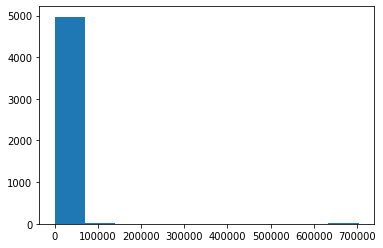

In [13]:
plt.hist(orders['order_amount'])

It looks like this is the case - we see that almost all orders are less than $100,000 with some around $100,000 and one close to $700,000! We can specify the bins of the histogram to look closer into the lower order values 

(array([  43., 1765.,  855., 1166.,  535.,  337.,  102.,   94.,   23.,
           9.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 <BarContainer object of 10 artists>)

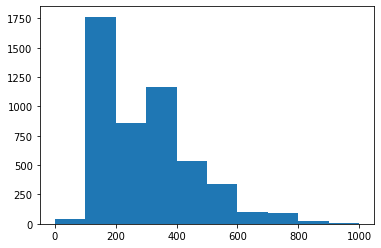

In [15]:
plt.hist(orders['order_amount'], bins=[0, 100, 200, 300, 400, 500,600, 700, 800, 900,1000])

In [19]:
print("max order val: " ,orders['order_amount'].max())
print("min order val: " , orders['order_amount'].min())
print("mean order val: ",orders['order_amount'].mean())
print("median order val: ", orders['order_amount'].median())

max order val:  704000
min order val:  90
mean order val:  3145.128
median order val:  284.0


# Question 1)
A couple extreme outliers are causing this AOV to look a lot larger than it should be. We shouldn't dismiss these outliers, though, as they could be something important that we need to look into. While these could just be a result of input errors, they could also represent fraud or sneaker bots that buy up a ton of sneakers at launch, just to resell them later. We can see that when we calculate the AOV using the ***median***, instead of the mean, we get a value of ***$284***. This is more in line with what we would expect to see for sneakers! The median is a summary metric that is less sensitive to outliers.

An additonal metric that could be used is the trimmed mean (the mean that excludes a small percentage of the smallest and largest values in the dataset). Here we see that the 10% trimmed mean for this data set is ***$287*** , very close to the median value of $284 and a reasonable value for sneaker stores.

In [23]:
stats.trim_mean(orders['order_amount'], 0.1)

287.39075

# Question 2

## 2a)
* Query: *"SELECT count(OrderID) FROM Orders join Shippers on Orders.ShipperID = Shippers.ShipperID WHERE Shippers.ShipperName = "Speedy Express""*
* Answer: ***54***


## 2b)
* Query: * "SELECT LastName, MAX(ordercount) FROM (SELECT Employees.EmployeeID, Employees.LastName, count(Orders.OrderID) as ordercount FROM Employees JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID GROUP BY Employees.EmployeeID)" *
* Answer: ***Peacock*** and they sold ***40*** orders.

## 2c) 
* Query: * "SELECT ProductName, MAX(totalquantity) FROM (SELECT Products.ProductName, Products.ProductID, sum(OrderDetails.Quantity) as totalquantity FROM Products JOIN OrderDetails on Products.ProductID = OrderDetails.ProductID JOIN Orders on Orders.OrderID = OrderDetails.OrderID JOIN Customers on Customers.CustomerID = Orders.CustomerID WHERE Customers.Country = "Germany" GROUP BY Products.ProductID)" *
* Answer: ***Boston Crab Meat***, for which ***160*** units were ordered by customers in germany.  